## Tarea 2 Reglas de Asociación

**Fecha de entrega: subir la tarea a su repositorio de github antes del lunes 8 de diciembre de 2020**

Utilizaremos datos de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH). 2018 Nueva serie.

> La Encuesta Nacional de Ingresos y Gastos de los Hogares 2018 se llevó a cabo del 21 de agosto al 28 de noviembre de 2018. Su objetivo es proporcionar un panorama estadístico del comportamiento de los ingresos y gastos de los hogares en cuanto a su monto, procedencia y distribución; adicionalmente, ofrece información sobre las características ocupacionales y sociodemográficas de los integrantes del hogar, así como las características de la infraestructura de la vivienda y el equipamiento del hogar

Para descargar los datos de la tarea  entrar  en la carpeta de datos del repositorio de la clase [datos enigh](https://github.com/leonardomarintellez/datos_masivos_II_2020/tree/master/datos/enigh)

Los datos para la tarea constande 2 tablas, la tabla de gastos y la tabla de hogares. La primera incluye los gastos de los hogares y la segunda datos sociodemograficos de los hogares (notar que dentro de una vivienda puede haber más de un hogar).

**Objetivo de la tarea**. Identificar reglas de asociación asociadas a ingresos altos de los hogares. Nota: Ustedes decidirán a partir de que valor se considera ingreso alto para un hogar

Si desean consultar mayor detalle de la encuesta ir al siguiente link [ENIGH](https://www.inegi.org.mx/programas/enigh/nc/2018/)

In [20]:
# Librerías
import pandas as pd
import numpy as np

In [21]:
# Leer los datos de Gasto
valores_missing = ['', ' ']
gasto = pd.read_csv("conjunto_de_datos_gastoshogar_enigh_2018_ns.csv", \
                    usecols= [0,1,14], na_values = valores_missing)
gasto.head()

,folioviv,foliohog,gasto
0,100013601,1,30.0
1,100013601,1,84.0
2,100013601,1,60.0
3,100013601,1,33.0
4,100013601,1,2400.0


In [22]:
gasto.shape

(1048575, 3)

Colapsar la información a nivel hogar

In [23]:
# Colapsar la info a nivel hogar
gasto_x_hogar =gasto.groupby(['folioviv','foliohog']).agg({'gasto':['sum']})
gasto_x_hogar.head()

,,gasto
,,sum
folioviv,foliohog,
100013601,1,2607.0
100013602,1,23696.0
100013603,1,38780.0
100013604,1,7428.0
100013606,1,2547.0


In [24]:
gasto_x_hogar.shape

(44250, 1)

Crear variable indicadora para determinar un 'ingreso alto' de un hogar. Esto usualmente va alineado con las reglas del negocio o el problema que estás resolviendo 

**Definir valor para ingreso alto**. Enuncia el porque de tu valor o incluye la referencia si utilizaste alguna

In [25]:
# Incluye tu justificación para el ingreso aquí

Como primer acercamiento, se proponía utilizar el rango interquatilico para detectar outliers, esto quiere decir que las observaciones que se encuentren fuera de $Q_{3} + 1.5IQR$, será denominado como "ingreso alto", sin embargo, se decidió dejar los valores que superaran el $Q_{3}$ porque este punto de corte considero que agrupo mejor en las dos categorías. 

En primer lugar, vamos a graficar nuestros valores en una gráfica de "caja y bigotes", esto nos permitirá darnos una idea de manera visual cuantas observaciones están por afuera.

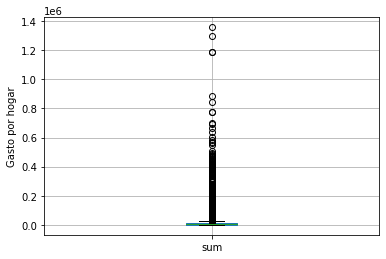

In [26]:
import matplotlib.pyplot as plt
df = gasto_x_hogar.copy()
df = df.reset_index(drop=True)
df.columns = df.columns.droplevel()
df.boxplot()
plt.ylabel("Gasto por hogar")
plt.show()

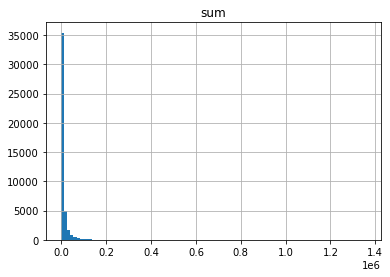

In [27]:
df.hist(bins=100)
plt.show()

In [28]:
arr = df["sum"].to_numpy()

In [29]:
import numpy as np
mediana = np.quantile(arr, q=0.5)
Q1 = np.quantile(arr, q=0.25)
Q3 = np.quantile(arr, q=0.75)
Rango_IQ = Q3 - Q1
Minimo = Q1 - (1.5*Rango_IQ)
Maximo = Q3 + (1.5*Rango_IQ)
print("La mediana es: ", mediana) 
print("Q1:", Q1)
print("Q3:", Q3)
print("El rango interquatilico es: ", Rango_IQ)
print("El máximo es: ", Maximo)

La mediana es:  4708.0
Q1: 2101.25
Q3: 10842.75
El rango interquatilico es:  8741.5
El máximo es:  23955.0


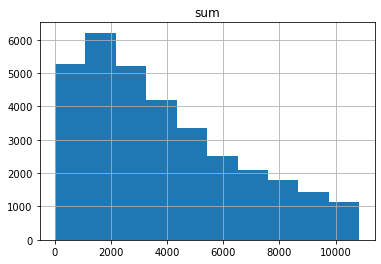

In [30]:
df[df["sum"] < Q3].hist()
plt.show()

Nota:

In [31]:
ingreso_alto = Q3 #Ingresar tu valor de ingreso alto aquí

In [32]:
gasto_x_hogar['ingreso_alto'] = gasto_x_hogar['gasto']['sum'].map(lambda x: x > ingreso_alto)
# Borrar la variable gasto
del gasto_x_hogar['gasto']

In [33]:
gasto_x_hogar.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44250 entries, (100013601, 1) to (1909929214, 1)
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   (ingreso_alto, )  44250 non-null  bool 
dtypes: bool(1)
memory usage: 599.6 KB


In [34]:
# Hacer el aggregate de la info generó vaiables multinivel por ello se reasignó el nombre de las columnas
# gasto_x_hogar.columns = ['foliohog', 'folioviv', 'ingreso_alto']
gasto_x_hogar.columns = ['ingreso_alto']

In [35]:
gasto_x_hogar.head(10)

,,ingreso_alto
folioviv,foliohog,
100013601,1,False
100013602,1,True
100013603,1,True
100013604,1,False
100013606,1,False
100026701,1,False
100026703,1,True
100026704,1,True
100026706,1,False


In [36]:
gasto_x_hogar["ingreso_alto"].value_counts()/gasto_x_hogar.shape[0]

False    0.749989
True     0.250011
Name: ingreso_alto, dtype: float64

Sólo utilizaremos ciertas variables de la tabla de hogares. El detalle de las variables de la tabla de hogares puede ser cnsultado en el diccionario de datos ubicado en la carpeta de los datos

Las variables autilizar son:

- folioviv: Identificador de la vivienda compuesto por dos dígitos con la clave de la entidad federativa, uno con el ámbito (urbano, código diferente a 6; rural, código 6), cuatro dígitos del número consecutivo de la upm, un dígito de la decena de levantamiento y dos dígitos con un número consecutivo para la vivienda seleccionada.
- foliohog:	El código 1 identifica al hogar principal y del 2 al 5 los hogares adicionales.
- alim17_1:	Número de días que comieron alimentos hechos de maíz, trigo, arroz, avena, salvado, etcétera, durante la última semana.
- alim17_2:	Número de días que comieron alimentos provenientes de raíces o tubérculos, durante la última semana.
- alim17_3:	Número de días que comieron verduras durante la última semana.
- alim17_4:	Número de días que comieron frutas durante la última semana.
- alim17_5:	Número de días que comieron carne durante la última semana.
- alim17_6:	Número de días que comieron huevo durante la última semana.
- alim17_7:	Número de días que comieron pescado o mariscos durante la última semana.
- alim17_8:	Número de días que comieron leguminosas o semillas durante la última semana.
- alim17_9:	Número de días que comieron productos lácteos durante la última semana.
- alim17_10:	Número de días que comieron aceites o grasas durante la última semana.
- alim17_11:	Número de días que comieron azúcar o mieles durante la última semana.
- alim17_12:	Número de días que comieron otros alimentos como condimentos, café, té durante la última semana.

- telefono:	Servicio de línea telefónica en el hogar ya sea con instalación alámbrica o satelital (antena). 
- celular:	Hogares que cuentan con el servicio de teléfono móvil aunque sea un sólo integrante del hogar.
- tv_paga:	Hogares que cuentan con los servicios de televisión por pago, considerando que el servicio está en funcionamiento.
- conex_inte:	Hogares que cuentan con el servicio de línea telefónica, tarjeta prepagada o telecable.

- num_auto:	Número de automóviles con los que cuenta el hogar.
- num_van:	Número de camionetas cerradas o con cabina (van o minivan) con las que cuenta el hogar.
- num_pickup:	Número de camionetas con caja con las que cuenta el hogar.
- num_moto:	Número de motocicletas o motonetas con las que cuenta el hogar.
- num_bici:	Número de bicicletas que se utilicen como medio de transporte en el hogar.
- num_trici:	Número de triciclos que se utilicen como medio de transporte en el hogar.
- num_carret:	Número de carretas, calandrias u otros vehículos de tracción animal con los que cuenta el hogar.
- num_canoa:	Número de canoas, lanchas, trajineras u otros vehículos para navegar con los que cuenta el hogar.
- num_otro:	Número de otro tipo de vehículos con los que cuenta el hogar.
- num_ester:	Número de estéreos, modulares o minicomponentes con los que cuenta el hogar.
- num_grab:	Número de grabadoras con las que cuenta el hogar.
- num_radio:	Número de radios con las que cuenta el hogar.
- num_tva:	Número de televisores analógicos con los que cuenta el hogar.
- num_tvd:	Número de televisores digitales con los que cuenta el hogar.
- num_dvd:	Número de DVDs, Blu-ray (reproductores de discos de video) con los que cuenta el hogar.
- num_video:	Número de videocaseteras con las que cuenta el hogar.
- num_licua:	Número de licuadoras con las que cuenta el hogar.
- num_tosta:	Número de tostadores con los que cuenta el hogar.
- num_micro:	Número de hornos de microondas con los que cuenta el hogar.
- num_refri:	Número de refrigeradores con los que cuenta el hogar.
- num_estuf:	Número de estufas de gas o eléctricas con las que cuenta el hogar.
- num_lavad:	Número de lavadoras con las que cuenta el hogar.
- num_planc:	Número de planchas eléctricas con las que cuenta el hogar.
- num_maqui:	Número de máquinas de coser con las que cuenta el hogar.
- num_venti:	Número de ventiladores con los que cuenta el hogar.
- num_aspir:	Número de aspiradoras con las que cuenta el hogar.
- num_compu:	Número de computadoras con las que cuenta el hogar.
- num_impre:	Número de impresoras con las que cuenta el hogar.
- num_juego:	Número de videojuegos (Wii, Playstation, Xbox, otros) con los que cuenta el hogar.


In [37]:
# Leer los datos de los hogares
valores_missing = ['', ' ']
hogares = pd.read_csv("conjunto_de_datos_hogares_enigh_2018_ns.csv", \
                    index_col= [0,1], \
                    usecols= [0, 1, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, \
                              41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, \
                              77, 79, 81, 83, 85, 87, 89, 91, 93, 95], \
                      na_values = valores_missing)
hogares.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_refri,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,7,1,7,7,4,7,1,7,7,7,...,1.0,1.0,1.0,1.0,1,1.0,1,1,0,0
100013602,1,7,3,4,3,3,2,0,5,7,5,...,1.0,1.0,1.0,1.0,1,1.0,1,2,1,1
100013603,1,4,2,5,4,5,3,2,2,3,4,...,1.0,1.0,1.0,1.0,0,1.0,0,1,0,0
100013604,1,7,3,7,7,4,7,1,5,2,7,...,1.0,1.0,1.0,1.0,1,5.0,0,0,0,0
100013606,1,7,1,1,7,3,7,0,2,7,7,...,1.0,1.0,1.0,1.0,0,0.0,0,0,0,0


In [38]:
hogares.shape

(74647, 45)

La librería que usaremos para obtener las reglas de asociación requiere un Data Frame con variables Booleanas por tal motivo las transformaremos 

**Nota.** Recordar que en reglas de asociación, nos interesa que la 'canasta' contenga el item y no el número de items

In [39]:
# Transformar a valores Booleanos
hogares_bool = hogares > 0

Unir el valor de gasto por hogar a la tabla de hogares

In [40]:
#help(pd.merge)

In [41]:
#union = hogares.merge(gasto_x_hogar, how='left', left_on= ['folioviv','foliohog'], right_on=['folioviv','foliohog'])
union = hogares_bool.merge(gasto_x_hogar, how='left', left_index=True, right_index=True)
union.shape

(74647, 46)

In [42]:
union.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego,ingreso_alto
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
100013602,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
100013603,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,False,True,False,False,True
100013604,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
100013606,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,False,False,False,False,False,False,False


In [43]:
# Checar la cantidad de missings para la variable gasto
union.ingreso_alto.isnull().sum()

30397

In [44]:
# filtrar donde no haya missings
datos = union[union.ingreso_alto.notnull()]
datos["ingreso_alto"] = datos["ingreso_alto"].astype(bool)
datos.shape

<ipython-input-44-541aebc02e2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["ingreso_alto"] = datos["ingreso_alto"].astype(bool)


(44250, 46)

In [45]:
datos.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego,ingreso_alto
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
100013602,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
100013603,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,False,True,False,False,True
100013604,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
100013606,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,False,False,False,False,False,False,False


In [46]:
# Revisar cuantos registros tienen ingreso alto
datos.ingreso_alto.sum()

11063

Para comenzar a hacer pruebas pueden trabajar con una muestra de los datos.

In [47]:
# help(pd.DataFrame.sample)

In [48]:
datos_muestra = datos.sample(n=10000, random_state = 202011)

**Ejercicio 1**

Experimentar con diferentes niveles de soporte, confianza y lift para encotrar reglas de asociación que les hagan sentido considerando la variable ingreso_alto como **consecuente**

In [49]:
#!pip install mlxtend 

In [50]:
# Importar las funciones a utilizar
from mlxtend.frequent_patterns import apriori, association_rules

Experimentar con distintos niveles de soporte y el máximo número elementos en los itemsets.

Nota. Para saber el soporte de cada variable individual se puede ejecutar datos.mean()

La opción de low_memory nos permite ejecutar el algoritmo para datos 'grandes' cuando nuestros recursos de memoria son limitados pero toma más tiempo ejecutarse

In [51]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

In [52]:
# Usar el algoritmo Apriori para obtener itemsets frecuentes
frequent_itemsets = apriori(datos, 
                            min_support = 0.2, #Inserta valor 
                            max_len = 5, #Inserta valor
                            use_colnames = True,
                            low_memory = True) 

In [54]:
print(frequent_itemsets.shape)
display(frequent_itemsets.head())

(92600, 2)


,support,itemsets
0,0.995458,(alim17_1)
1,0.836565,(alim17_2)
2,0.943119,(alim17_3)
3,0.895706,(alim17_4)
4,0.925605,(alim17_5)


Experimentar con distintos valores (pueden variar la métrica si lo consideran adecuado)

In [55]:
help(association_rules)

Help on function association_rules in module mlxtend.frequent_patterns.association_rules:

association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)
    Generates a DataFrame of association rules including the
    metrics 'score', 'confidence', and 'lift'
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame of frequent itemsets
      with columns ['support', 'itemsets']
    
    metric : string (default: 'confidence')
      Metric to evaluate if a rule is of interest.
      **Automatically set to 'support' if `support_only=True`.**
      Otherwise, supported metrics are 'support', 'confidence', 'lift',
      'leverage', and 'conviction'
      These metrics are computed as follows:
    
      - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]
    
      - confidence(A->C) = support(A+C) / support(A), range: [0, 1]
    
      - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]
    
      - leverage(A->C) = suppo

In [56]:
# Generar reglas de asociación con un nivel mínimo de confianza
rules = association_rules(frequent_itemsets, 
                          metric = 'support', 
                          min_threshold = 0.2) # Inserta valor

In [57]:
print(rules.shape)
display(rules.head())

(2401894, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alim17_1),(alim17_2),0.995458,0.836565,0.835096,0.838907,1.002799,0.002331,1.014536
1,(alim17_2),(alim17_1),0.836565,0.995458,0.835096,0.998244,1.002799,0.002331,2.586916
2,(alim17_1),(alim17_3),0.995458,0.943119,0.940972,0.945265,1.002276,0.002137,1.039223
3,(alim17_3),(alim17_1),0.943119,0.995458,0.940972,0.997724,1.002276,0.002137,1.995440
4,(alim17_1),(alim17_4),0.995458,0.895706,0.893401,0.897478,1.001978,0.001764,1.017280


Notar que el número de reglas puede ser mucho mayor que el número de itemsets frecuentes

Filtrar las reglas donde el consecuente es la variable ingreso alto

In [58]:
rules_income_consecuent = rules[rules['consequents'] == {'ingreso_alto'}]
rules_income_consecuent.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,(alim17_1),(ingreso_alto),0.995458,0.250011,0.248362,0.249495,0.997934,-0.000514,0.999312
115,(alim17_2),(ingreso_alto),0.836565,0.250011,0.217220,0.259657,1.038583,0.008070,1.013029
169,(alim17_3),(ingreso_alto),0.943119,0.250011,0.242893,0.257542,1.030121,0.007102,1.010143
220,(alim17_4),(ingreso_alto),0.895706,0.250011,0.237085,0.264690,1.058713,0.013148,1.019963
271,(alim17_5),(ingreso_alto),0.925605,0.250011,0.242802,0.262317,1.049223,0.011391,1.016682


In [59]:
rules_income_consecuent.shape

(4896, 9)

La siguiente gráfica puede servir para identificar puntos de corte para filtrar reglas. 

In [60]:
# Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

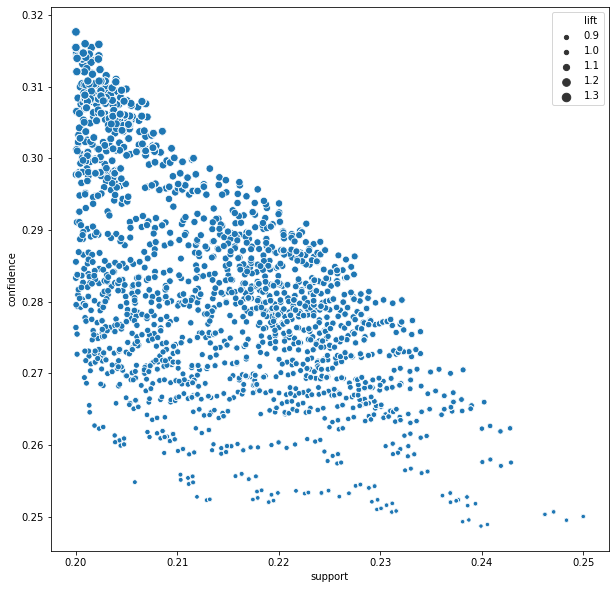

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules_income_consecuent)

plt.show()

Experimentar con distintos niveles de de soporte, confianza y lift

In [69]:
filtered_rules = rules_income_consecuent[(rules_income_consecuent['support'] > 0.2) &  # Modifca el valor
                (rules_income_consecuent['confidence'] > 0.3) & # Modifica el valor
                (rules_income_consecuent['lift'] >= 1)] # Modifica el valor

In [70]:
print(filtered_rules.shape)

(678, 9)


In [85]:
filtered_rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
813,(num_lavad),(ingreso_alto),0.694847,0.250011,0.209424,0.301395,1.205527,0.035704,1.073552
3077,"(alim17_1, num_lavad)",(ingreso_alto),0.692542,0.250011,0.208339,0.300832,1.203274,0.035196,1.072688
6779,"(num_tvd, alim17_3)",(ingreso_alto),0.677740,0.250011,0.205198,0.302768,1.211016,0.035755,1.075665
6978,"(num_lavad, alim17_3)",(ingreso_alto),0.665605,0.250011,0.205040,0.308050,1.232145,0.038631,1.083877
8524,"(num_tvd, alim17_4)",(ingreso_alto),0.651480,0.250011,0.200904,0.308381,1.233467,0.038027,1.084395
8723,"(alim17_4, num_lavad)",(ingreso_alto),0.639232,0.250011,0.200633,0.313866,1.255405,0.040818,1.093064
8741,"(alim17_4, num_planc)",(ingreso_alto),0.690328,0.250011,0.207751,0.300946,1.203730,0.035162,1.072862
10121,"(num_tvd, alim17_5)",(ingreso_alto),0.671141,0.250011,0.205311,0.305913,1.223596,0.037518,1.080540
10319,"(alim17_5, num_lavad)",(ingreso_alto),0.661831,0.250011,0.204949,0.309670,1.238625,0.039484,1.086421
11772,"(num_lavad, alim17_6)",(ingreso_alto),0.661672,0.250011,0.200972,0.303733,1.214877,0.035546,1.077157


**Describir hallazgos**

In [43]:
## Redactar aquí

Las tuplas de artículos que tienen un soporte de antecedente alto en su mayoría se refieren a alimentos que ha consumido los integrantes del hogar: frutas, verduras o leguminosas con objetos materiales como tener lavadoras o planchas (electro domésticos), estos estna asociados a familiar con ingresos altos. También, llamó mi atención que en los últimos se encuentran tuplas que contienen servicios que se relacionan a un hogar donde hay un sostén económico estable, tales como conexión a internet, televisión de paga y por lo tanto, tener aparatos cocmo celular y televisión. Por la parte de confidence, hay una probabilidad alta de que hogares catalogados con ingreso alto tengan acceso a comprar una canasta de alimentos muy diversa que les permita tener una dieta correcta, además de poseer servicios para su entretenimiento/ocio.

**Ejercicio 2**

La siguiente métrica propuesta por Zhang T. permite medir un grado de asociación entre el antecedente y el consecuente. Un par de propiedades para está métrica son:

- Toma valores entre -1 y +1
- Valores cercanos a +1 indican asociación positiva alta
- Valores cercanos a -1 indican asociación negativa alta
- Sólo se requiere utilizar el soporte para construirla

**Calcular la métrica de Zhang a la tabla rules_income_consecuent**

$$zhang(A \to B) = \frac{support(A \cup B) - support(A)*support(B)}{max[support(A \cup B)*(1 - support(A)),support(A)*(support(B) - support(A \cup B))]}$$

**Utilizar la métrica de Zhang para encontrar asociaciones negativas altas y asociaciones positivas altas**

In [72]:
# Código y hallazgos a partir de aquí

In [73]:
rules_income_consecuent.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,(alim17_1),(ingreso_alto),0.995458,0.250011,0.248362,0.249495,0.997934,-0.000514,0.999312
115,(alim17_2),(ingreso_alto),0.836565,0.250011,0.217220,0.259657,1.038583,0.008070,1.013029
169,(alim17_3),(ingreso_alto),0.943119,0.250011,0.242893,0.257542,1.030121,0.007102,1.010143
220,(alim17_4),(ingreso_alto),0.895706,0.250011,0.237085,0.264690,1.058713,0.013148,1.019963
271,(alim17_5),(ingreso_alto),0.925605,0.250011,0.242802,0.262317,1.049223,0.011391,1.016682


In [76]:
support_AUB = rules_income_consecuent[(rules_income_consecuent.antecedents == A)]["support"].values[0]
support_A = rules_income_consecuent[(rules_income_consecuent.antecedents == A)]["antecedent support"].values[0]
support_B = rules_income_consecuent[(rules_income_consecuent.antecedents == A)]["consequent support"].values[0]
Zhang_A_B = (support_AUB - (support_A*support_B))/(max(support_AUB*(1-support_A), support_A*(support_B-support_AUB)))

In [77]:
Zhang_A_B

-0.31303464354919225

In [79]:
def Zhang(A,B):
    support_AUB = rules_income_consecuent[(rules_income_consecuent.antecedents == A)]["support"].values[0]
    support_A = rules_income_consecuent[(rules_income_consecuent.antecedents == A)]["antecedent support"].values[0]
    support_B = rules_income_consecuent[(rules_income_consecuent.antecedents == A)]["consequent support"].values[0]
    Zhang_A_B = (support_AUB - (support_A*support_B))/(max(support_AUB*(1-support_A), support_A*(support_B-support_AUB)))
    return Zhang_A_B

In [80]:
A = {"alim17_1"}
B = {"ingreso_alto"}
display(rules_income_consecuent[rules_income_consecuent["antecedents"] == {'alim17_10', 'alim17_12'}])
Zhang(A,B)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15155,"(alim17_10, alim17_12)",(ingreso_alto),0.886757,0.250011,0.224904,0.253625,1.014455,0.003205,1.004842


-0.31303464354919225